<a href="https://www.kaggle.com/code/aisuko/segment-anything-model?scriptVersionId=164508678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

Segment Anything Model(SAM) is deep learning model developed by Meta AI that can genertate masks for any object in an image with a single click. SAM uses a variety of input prompts to segment objects in an image, inlcuding points, boxes, and freehand drawing.

SAM is based on a convolutional neural network architecture and is trained on a large dataset of annotated images. It can be fine-tuned on specific datasets to improve its performance.

Here we use an open source project's pictures with Apache 2.0 license to do a quick demo.

In [1]:
%%capture
!pip install segment-anything-hq==0.3

In [2]:
%%capture
!git clone https://github.com/SysCV/sam-hq.git
!wget https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth

In [3]:
from segment_anything_hq import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator


sam = sam_model_registry["vit_l"](checkpoint="sam_hq_vit_l.pth")
sam.to(device="cuda")

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    # The density of the point sampling grid used to generate the masks.
    # A higher value will result in more densely sampled masks.
    points_per_side=32,
    # The minimum intersection over union(loU) threshold required for a predicted mask to be considered valid. 
    # A higher value will result in fewer but more accurate masks.
    pred_iou_thresh=0.8,
    # The minimum stavility score required for a predicted mask to be considered stable.
    # A higher value will result in fewer but more stable mask.
    stability_score_thresh=0.9,
    # The number of layers used when cropping the image to generate masks for smaller objects.
    # A higher value will result in more layers and better performance on smaller objects.
    crop_n_layers=1,
    # The downscalling factor used when cropping the image to generate masks for smaller objects.
    # A higher value will result in more downsampling and better performance on smaller objects
    crop_n_points_downscale_factor=2,
    # The minimum area required for a predicted mask to be considered valid.
    # A higher value will result in fewer but larger masks.
    min_mask_region_area=100,
)

print(mask_generator)

<All keys matched successfully>


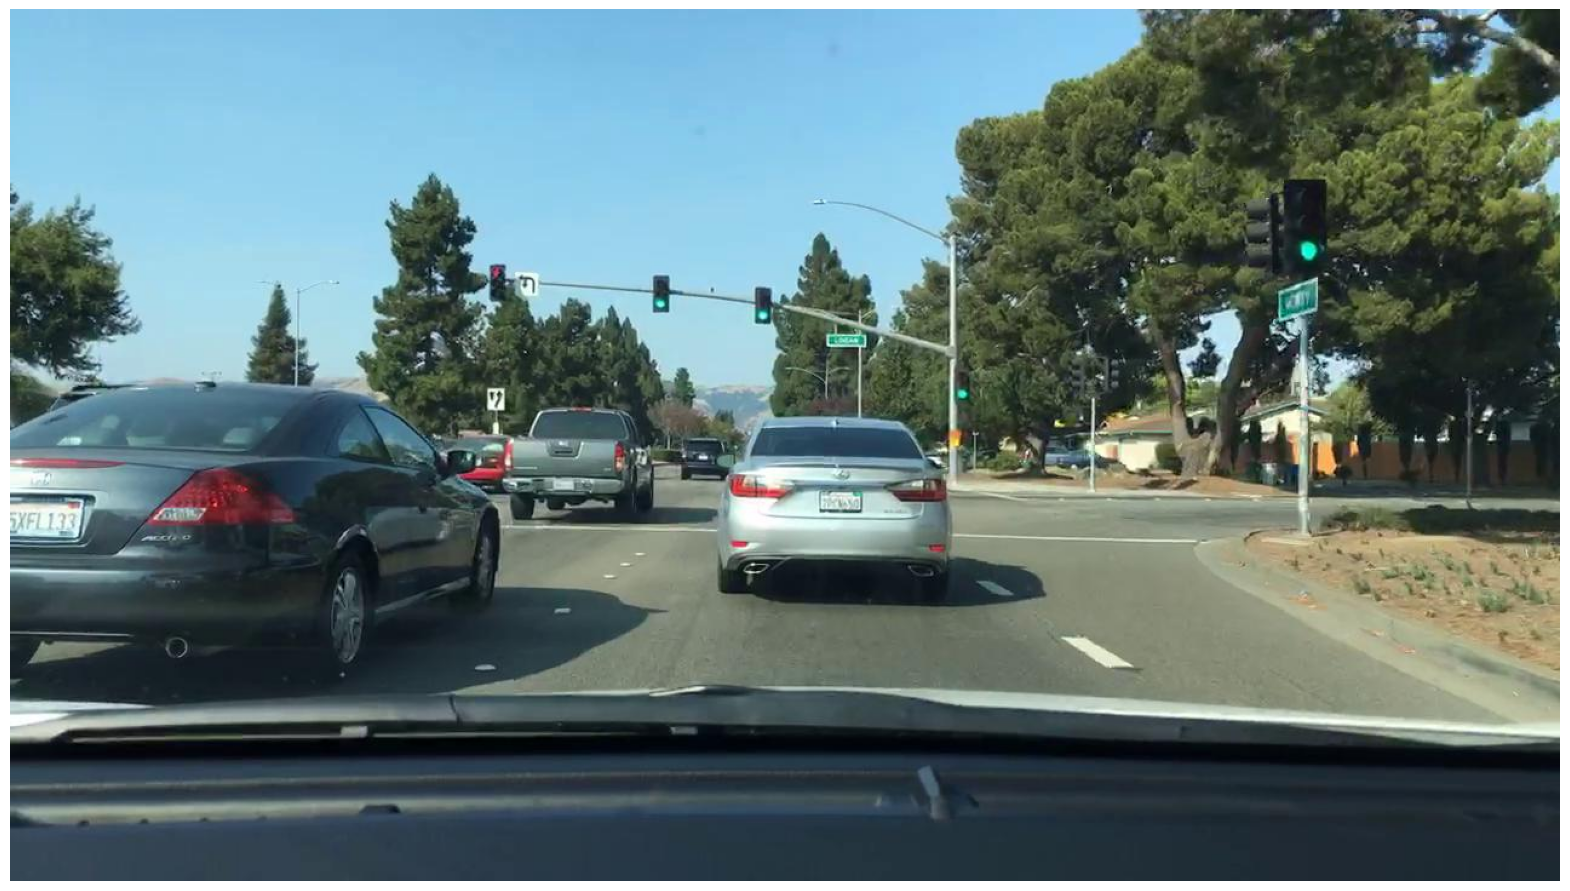

In [4]:
import matplotlib.pyplot as plt
import cv2

image=cv2.imread('sam-hq/demo/input_imgs/example8.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

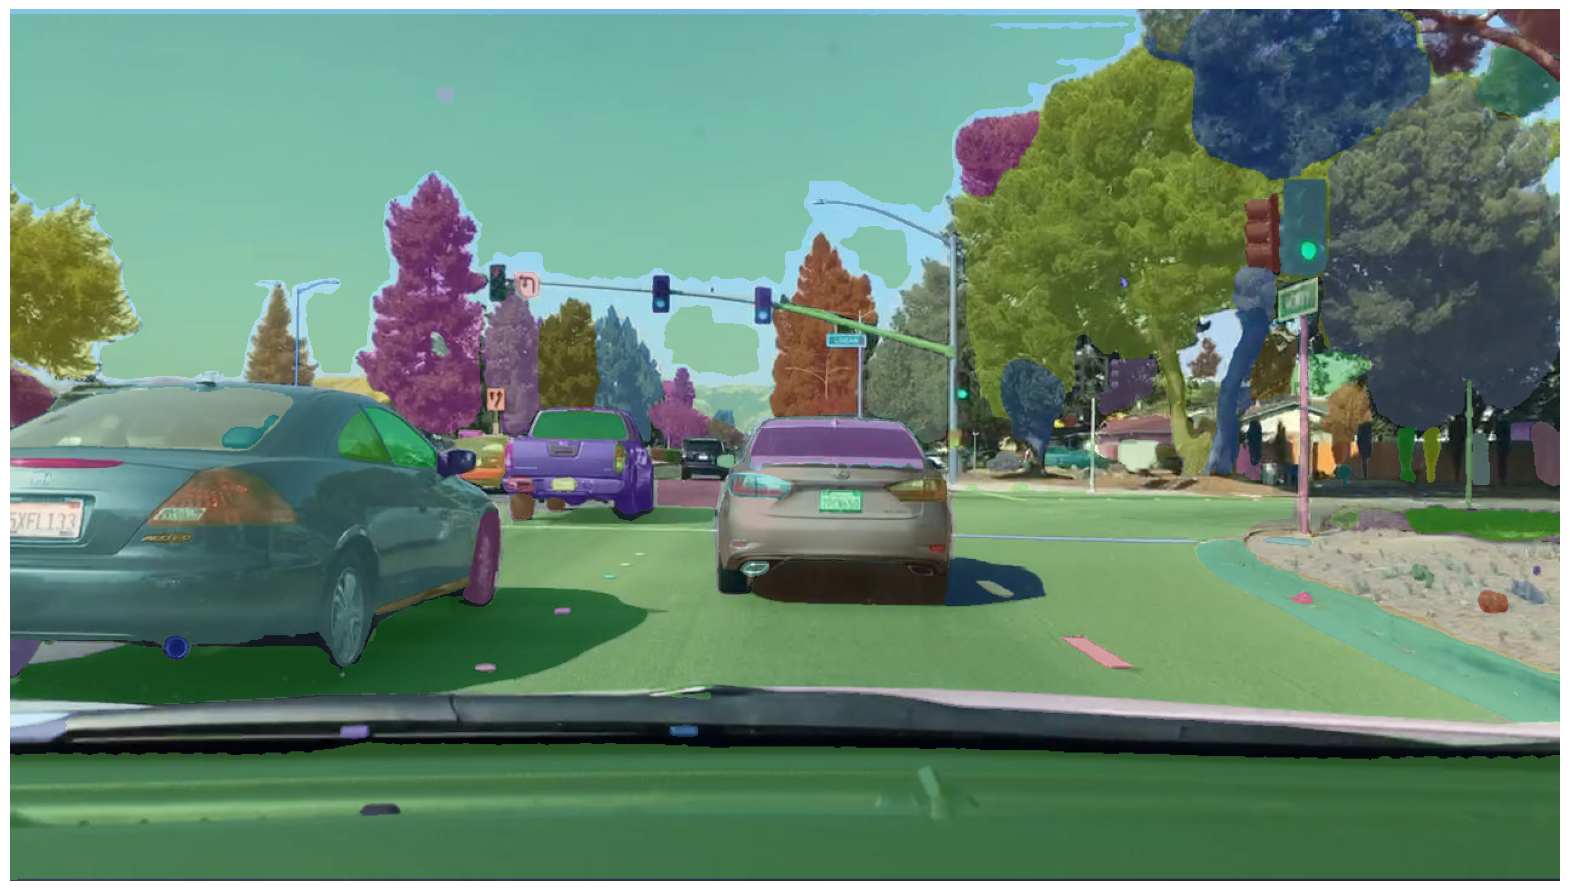

In [5]:
import numpy as np

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    plt.imsave('mask.png', img)
    
masks = mask_generator.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)

# Further step

Saving the picture as png to the local env

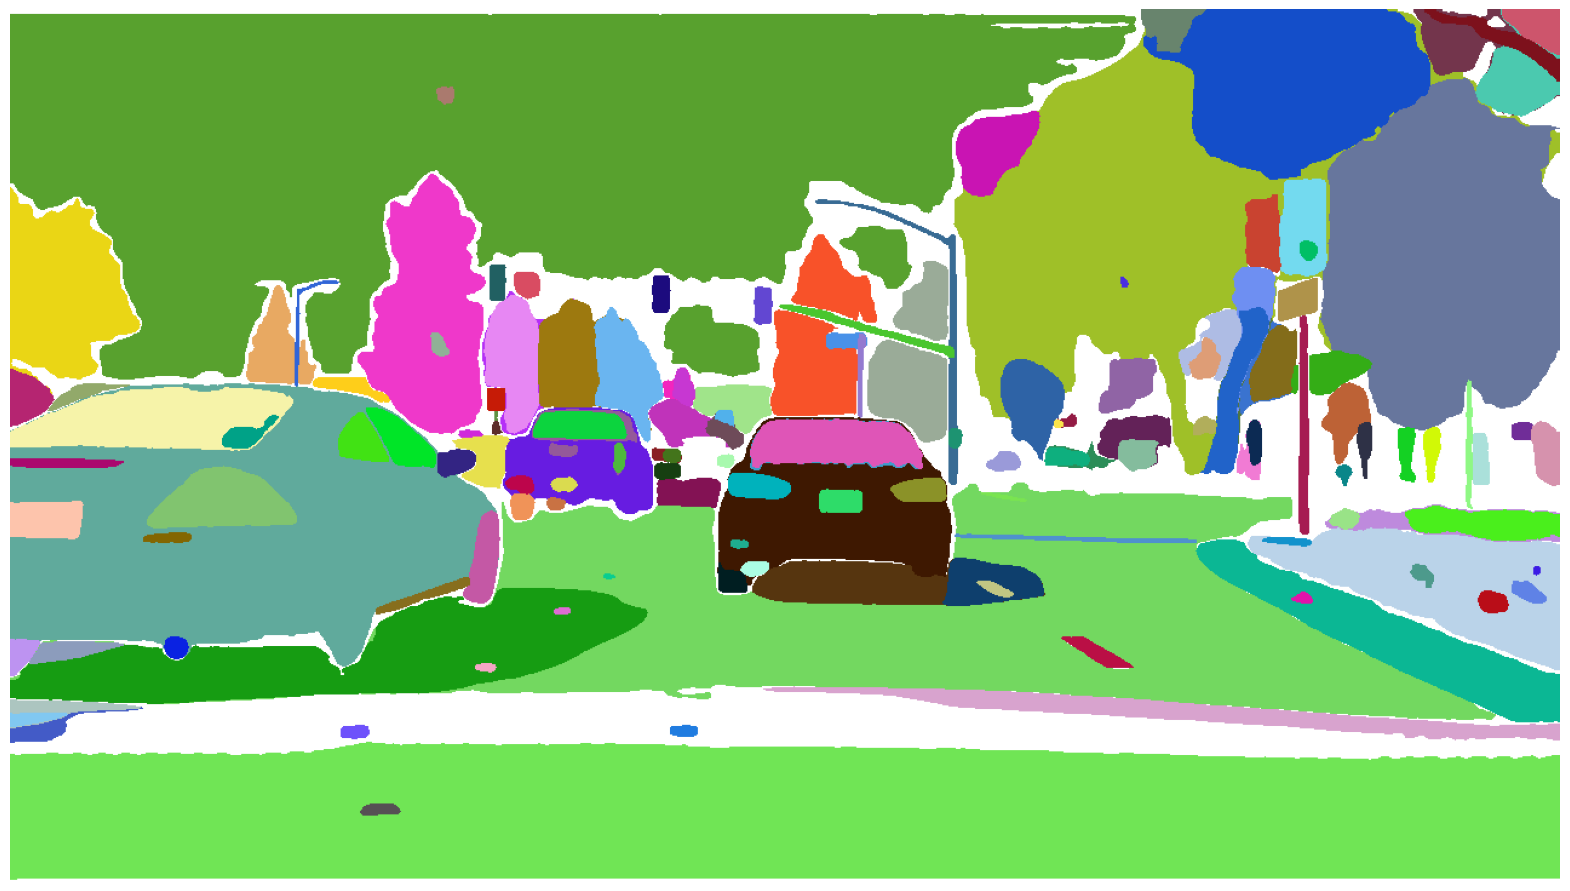

In [6]:
mask_image=cv2.imread('mask.png')
mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(mask_image)
plt.axis('off')
plt.show()